<a href="https://colab.research.google.com/github/Sheha1218/Covid/blob/main/Faca_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/omkargurav/face-mask-dataset')

Skipping, found downloaded files in "./face-mask-dataset" (use force=True to force download)


In [ ]:
data_dir=('/content/face-mask-dataset/data')

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [ ]:
len(data_dir)

31

In [ ]:
data=tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                         image_size=IMAGE_SIZE,
                                                         batch_size=BATCH_SIZE,
                                                         subset='training',
                                                         validation_split=0.15,
                                                         seed=42)

validation_data=tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                                    image_size=IMAGE_SIZE,
                                                                    batch_size=BATCH_SIZE,
                                                                    subset='validation',
                                                                    validation_split=0.1,
                                                                    seed=42)


Found 7553 files belonging to 2 classes.
Using 6421 files for training.
Found 7553 files belonging to 2 classes.
Using 755 files for validation.


In [ ]:
data.class_names

['with_mask', 'without_mask']

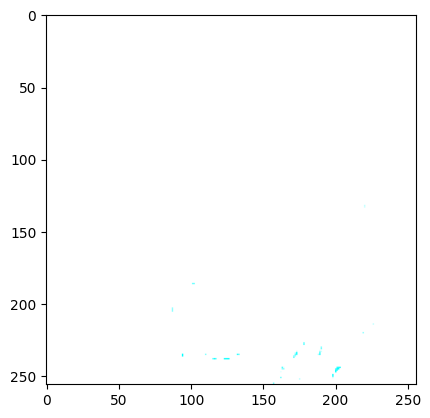

In [ ]:
for image_batch,label_batch in data.take(1):
  plt.imshow(image_batch[0])

In [ ]:
for image_batch,label_batch in data.take(1):
  print(f'image_batch shape = {image_batch.shape}')
  print(f'label_batch shape = {label_batch.shape}')

image_batch shape = (32, 256, 256, 3)
label_batch shape = (32,)


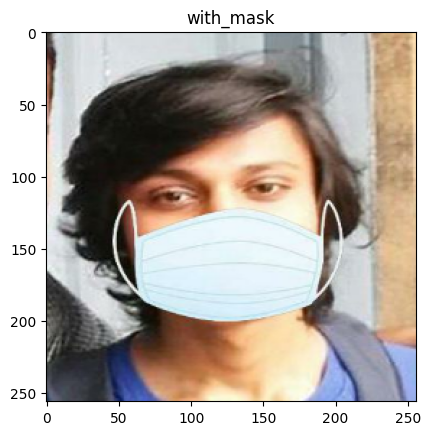

In [ ]:
for image_batch,label_batch in data.take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  plt.title(data.class_names[label_batch[0]])

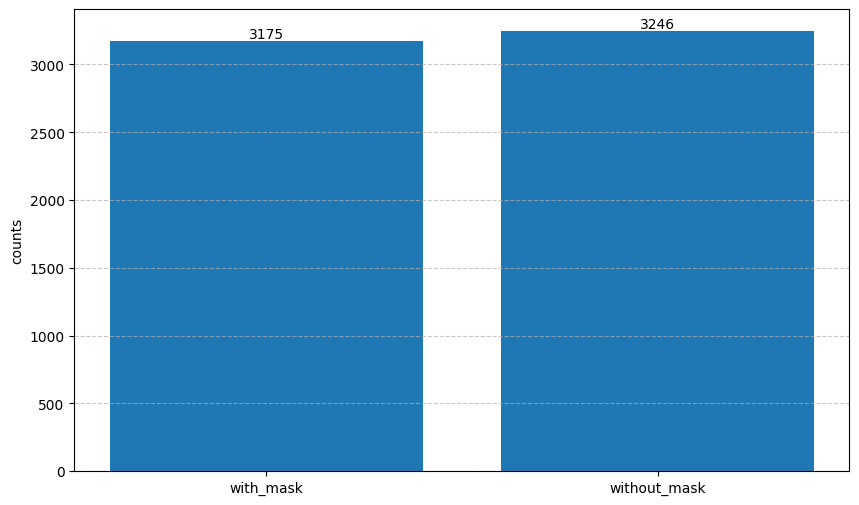

In [ ]:
classes=data.class_names

counts=[]
for class_name in classes:
  total_count_for_class = 0
  for _,label_batch in data.as_numpy_iterator():

    total_count_for_class += np.sum(label_batch==data.class_names.index(class_name))


  counts.append(total_count_for_class)

plt.figure(figsize=(10,6))
bars=plt.bar(classes,counts)

plt.xlabel=('Classes')
plt.ylabel('counts')

for bar in bars:
  height=bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
data=data.map(lambda x,y:(x/225.,y))
validation_data=validation_data.map(lambda x,y:(x/255.,y))

In [ ]:
data_augmentation=tf.keras.Sequential([
                  tf.keras.layers.RandomFlip('horizontal'),
                   tf.keras.layers.RandomRotation(0.2)
])

In [ ]:

model=tf.keras.Sequential()
model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2))

model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2))


model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='relu'))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))



In [ ]:
model.compile(tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryFocalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,581,677 (170.07 MB)

 Trainable params: 14,860,473 (56.69 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 29,720,948 (113.38 MB)

In [ ]:
history =model.fit(data,epochs=10,validation_data=validation_data)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 30s 125ms/step - accuracy: 0.5718 - loss: 0.1787 - val_accuracy: 0.6252 - val_loss: 0.1567
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 40s 119ms/step - accuracy: 0.7573 - loss: 0.1403 - val_accuracy: 0.8768 - val_loss: 0.1089
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 25s 124ms/step - accuracy: 0.8688 - loss: 0.1074 - val_accuracy: 0.8940 - val_loss: 0.0876
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 24s 119ms/step - accuracy: 0.8720 - loss: 0.0960 - val_accuracy: 0.9020 - val_loss: 0.0803
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 24s 120ms/step - accuracy: 0.8810 - loss: 0.0872 - val_accuracy: 0.9126 - val_loss: 0.0692
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 24s 119ms/step - accuracy: 0.8961 - loss: 0.0768 - val_accuracy: 0.9285 - val_loss: 0.0623
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 23s 116ms/step - accuracy: 0.9044 - loss: 0.0718 - val_accuracy: 0.8914 - val_loss: 0.0855
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.9028 - loss: 0

In [ ]:
history.history

{'accuracy': [0.5863572359085083,
  0.8084410429000854,
  0.8634169101715088,
  0.8741629123687744,
  0.8814826607704163,
  0.8950319290161133,
  0.9051549434661865,
  0.9079582691192627,
  0.9112287759780884,
  0.9148107767105103],
 'loss': [0.1700097769498825,
  0.13004834949970245,
  0.10733885318040848,
  0.09379934519529343,
  0.08680573850870132,
  0.07809797674417496,
  0.07237395644187927,
  0.06860319525003433,
  0.06532950699329376,
  0.06416332721710205],
 'val_accuracy': [0.625165581703186,
  0.8768212199211121,
  0.8940397500991821,
  0.9019867777824402,
  0.9125827550888062,
  0.9284768104553223,
  0.8913907408714294,
  0.929801344871521,
  0.9072847962379456,
  0.9350993633270264],
 'val_loss': [0.1566808670759201,
  0.10890204459428787,
  0.08762954920530319,
  0.08034490793943405,
  0.06915518641471863,
  0.062289342284202576,
  0.085474893450737,
  0.05704423040151596,
  0.06649801135063171,
  0.051498495042324066]}

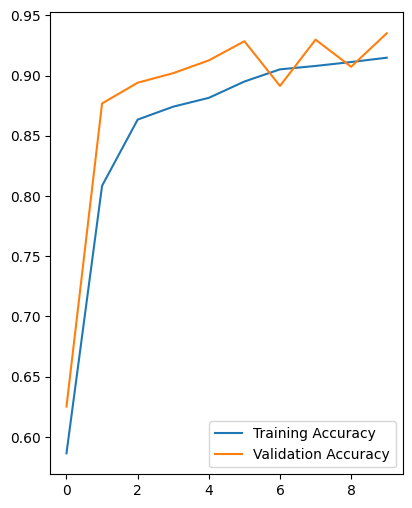

In [ ]:
EPOCHS = 10
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')

In [ ]:
model.save('model.h5')